In [57]:
# imports
from __future__ import print_function
import time
import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision

In [58]:
print("hi")
# default type is torch.float
x = torch.zeros(5, 3, dtype=torch.double)
print(x)
x = torch.ones_like(x, dtype=torch.int)      # new_* methods take in sizes
print(x)
print(x.size())

hi
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
torch.Size([5, 3])


In [59]:
y = torch.ones_like(x, dtype=torch.int)
print("before:")
print(x)
print(y)
print("after:")
y.add_(x)
print(x)
print(y)
print("copy:")
x.copy_(y)
print(x)
print(y)

before:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
after:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)
tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], dtype=torch.int32)
copy:
tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], dtype=torch.int32)
tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], dtype=torch.int32)


In [60]:
x = torch.randint(-2, 2, (3, 4))
print(x)
y = x.view(-1, 2)
print(y)

x = torch.randint(0, 9, [1], dtype=torch.uint8)  # randn allows negatives
print(x)
print(x.item())
x[-1] = -3
print(x)
print(x.item())

tensor([[ 0,  1, -1,  0],
        [ 1, -1, -1,  1],
        [ 0, -2, -1,  0]])
tensor([[ 0,  1],
        [-1,  0],
        [ 1, -1],
        [-1,  1],
        [ 0, -2],
        [-1,  0]])
tensor([7], dtype=torch.uint8)
7
tensor([253], dtype=torch.uint8)
253


In [61]:
x = torch.randint(0, 9, [3, 3], dtype=torch.int)  # randn allows negatives
print(x)
z = x.numpy()
z[:, 1] = 42
print(z)
print(torch.from_numpy(z))

tensor([[2, 1, 7],
        [0, 1, 8],
        [0, 7, 4]], dtype=torch.int32)
[[ 2 42  7]
 [ 0 42  8]
 [ 0 42  4]]
tensor([[ 2, 42,  7],
        [ 0, 42,  8],
        [ 0, 42,  4]], dtype=torch.int32)


In [62]:
x = torch.randint(2, [5, 3])
print(x)
y = torch.tensor([1, 2, 4]).reshape([-1, 1])
print(y)
print("x times y:")
print(x.matmul(y))

tensor([[1, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 1],
        [0, 0, 0]])
tensor([[1],
        [2],
        [4]])
x times y:
tensor([[1],
        [0],
        [0],
        [4],
        [0]])


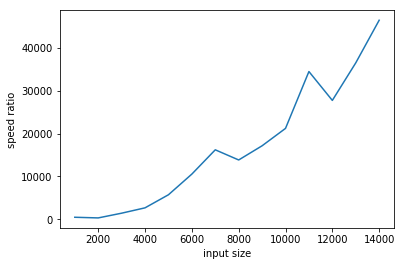

In [63]:
if not torch.cuda.is_available():
	print("no cuda available")
else:
	device = torch.device("cuda")
	domain = list()
	ratios = list()
	for n in range(1000, 15000, 1000):
		domain.append(n)
		
		x_cpu = torch.randn([n, n])
		y_cpu = torch.randn([n, n])
		time_start_cpu = time.time()
		xy_cpu = x_cpu.matmul(y_cpu)
		time_end_cpu = time.time()
		time_cpu = time_end_cpu - time_start_cpu
		# print("CPU time:", time_cpu)
		
		x_cuda = x_cpu.to(device)
		y_cuda = y_cpu.to(device)
		time_start_cuda = time.time()
		xy_cuda = x_cuda.matmul(y_cuda)
		time_end_cuda = time.time()
		time_cuda = time_end_cuda - time_start_cuda
		# print("CUDA time:", time_cuda)
		
		time_ratio = time_cpu / time_cuda
		ratios.append(time_ratio)
		# print("CUDA is", time_ratio, "times faster than CPU")
	plt.plot(domain, ratios)
	plt.xlabel("input size")
	plt.ylabel("speed ratio")
	plt.show()
